Lê Nguyễn Gia Huy - K214130918

Exercise 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load data and do some prep just like Exercise set 1**

In [2]:
canada_df = pd.read_csv('canadian_immegration_data.csv')
canada_df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [3]:
canada_df.set_index("Country", inplace=True)

In [4]:
canada_df["Total"] = canada_df.sum(axis=1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16908\1534550382.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  canada_df["Total"] = canada_df.sum(axis=1)


In [5]:
canada_df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,117278
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,31398
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,138878
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,12
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,30


In [6]:
years = list(map(str, range(1980, 2014)))

# 1. Pie Chart

In [7]:
continents_df = canada_df.groupby("Continent").sum()
continents_df['Total'].head()

Continent
Africa                             1237896
Asia                               6635588
Europe                             2821894
Latin America and the Caribbean    1530296
Northern America                    482284
Name: Total, dtype: int64

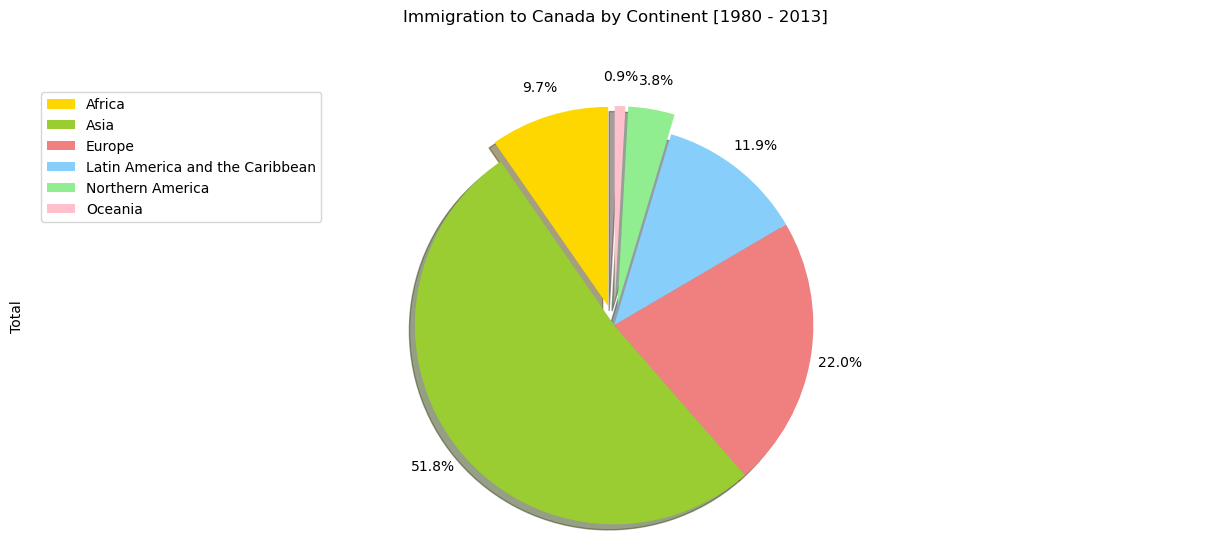

In [8]:
colors_list = ['gold', 'yellowgreen', 'lightcoral','lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

continents_df['Total'].plot(kind='pie',
                           figsize=(15, 6),
                           autopct='%1.1f%%',
                           startangle=90, 
                           shadow=True,
                           labels=None, # ko để tên lục địa lên biểu đồ
                           pctdistance=1.15, # khoảng cách của các chữ số % với trung tâm hình tròn
                           colors=colors_list,
                           explode=explode_list) # làm nổi lên 3 giá trị nhỏ nhất

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)
plt.axis('equal')

plt.legend(labels=continents_df.index, loc='upper left')
plt.show()

**Question: Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.**

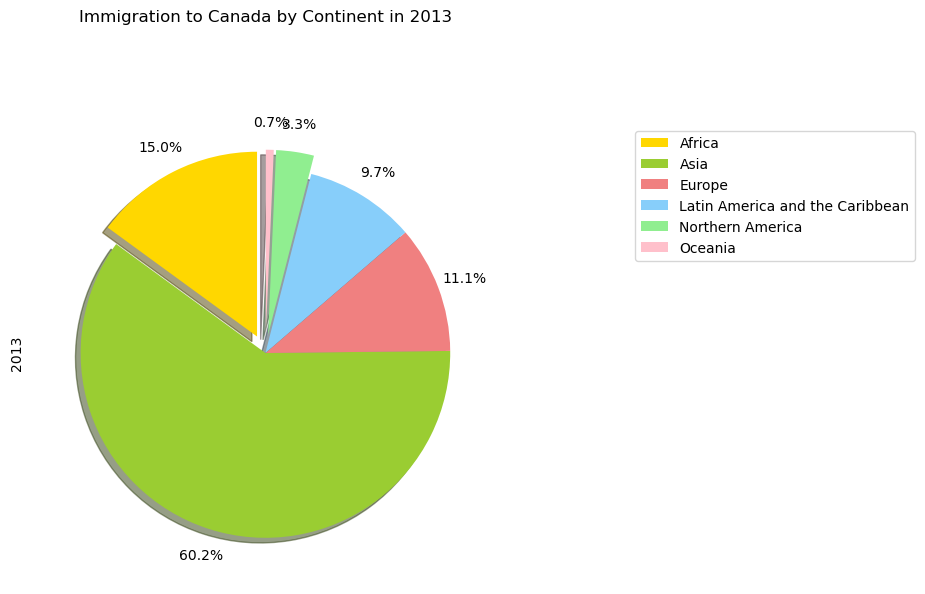

In [9]:
colors_list = ['gold', 'yellowgreen', 'lightcoral','lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

continents_df['2013'].plot(kind='pie',
                           figsize=(15, 6),
                           autopct='%1.1f%%',
                           startangle=90, 
                           shadow=True,
                           labels=None, # ko để tên lục địa lên biểu đồ
                           pctdistance=1.15, # khoảng cách của các chữ số % với trung tâm hình tròn
                           colors=colors_list,
                           explode=explode_list) # làm nổi lên 3 giá trị nhỏ nhất

plt.title('Immigration to Canada by Continent in 2013', y=1.2)
# plt.axis('equal')

plt.legend(labels=continents_df.index, loc=(1.3, 0.7))
plt.show()

# 2. Box Plots

In [10]:
japan_df = canada_df.loc[["Japan"], years].transpose()

In [11]:
japan_df.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


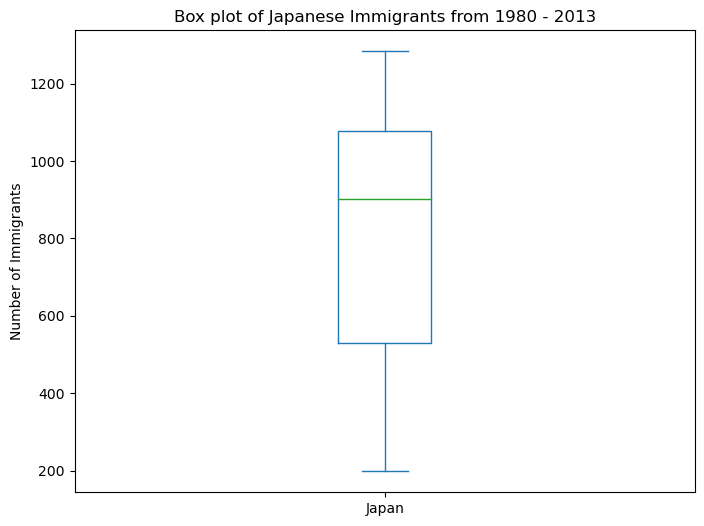

In [12]:
japan_df.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show();

**Question: Compare the distribution of the number of new immigrants from India
and China for the period 1980 - 2013.**

In [13]:
india_china_df = canada_df.loc[["India", "China"], years].transpose()
india_china_df.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


In [14]:
india_china_df.describe()

Country,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


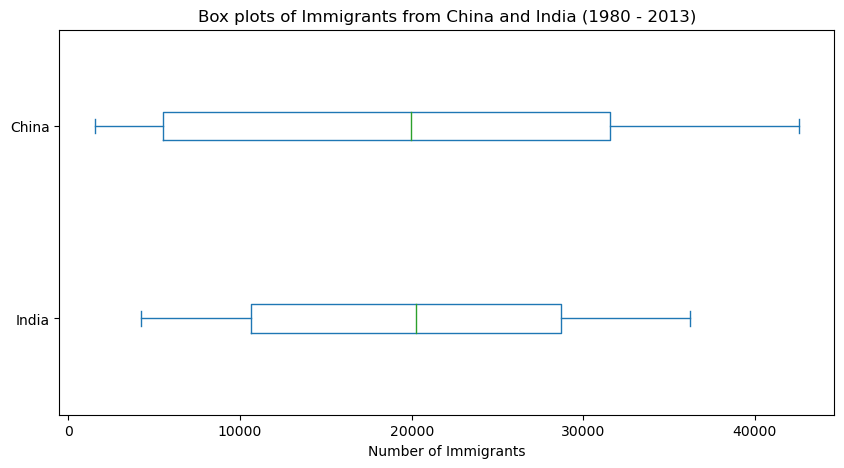

In [15]:
india_china_df.plot(kind="box", figsize=(10, 5), vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')
plt.show();

# 3. Subplots

Text(0.5, 0, 'Years')

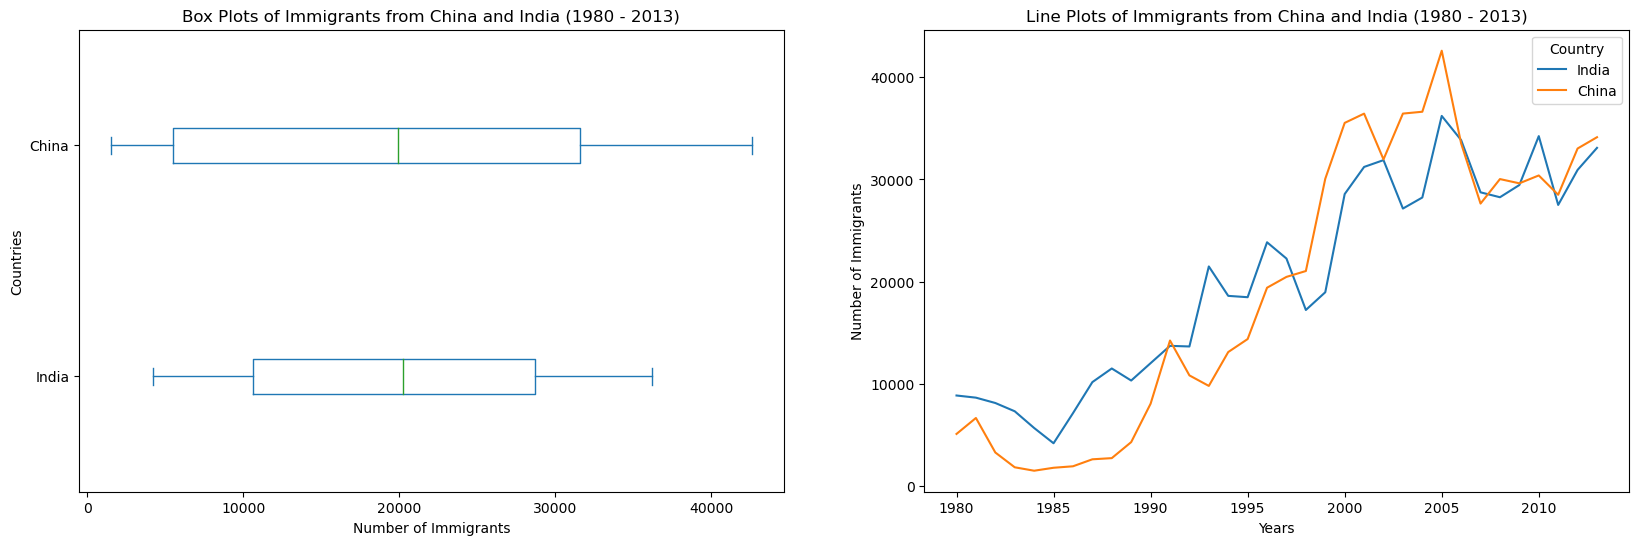

In [16]:
fig = plt.figure()

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

# Subplot 1: Box plot
india_china_df.plot(kind='box', ax = ax0, figsize=(20, 6), vert=False)

ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
india_china_df.plot(kind='line', ax=ax1, figsize=(20, 6))

ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

**Question: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.**

In [17]:
years_1980s = list(map(str, range(1980, 1990)))

# top15_1980s_df = canada_df.loc[]
top15_df = canada_df.sort_values(['Total'], ascending=False, axis=0).head(15)

top15_df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,1383808
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,1319924
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,1103000
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,1022782
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,483200


In [18]:
# Create a list of all years in decades 80’s, 90’s, and 00’s
year_80s = list(map(str, range(1980, 1990)))
year_90s = list(map(str, range(1990, 2000)))
year_00s = list(map(str ,range(2000, 2010)))

In [19]:
#  Slice the dataframe top15_df to create a series for each decade and sum across all years for each country.
top15_80s = top15_df[year_80s].sum(axis=1)
top15_90s = top15_df[year_90s].sum(axis=1)
top15_00s = top15_df[year_00s].sum(axis=1)

In [20]:
top15_by_decade = pd.DataFrame({'1980s': top15_80s, '1990s': top15_90s, '2000s':top15_00s})
top15_by_decade.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


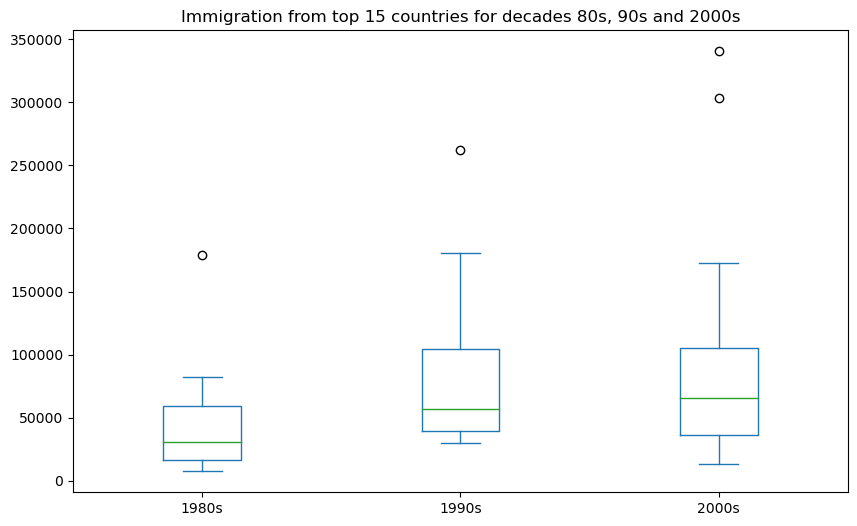

In [21]:
# Plot the box plots
top15_by_decade.plot(kind='box', figsize=(10, 6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()

In [22]:
# let's check how many entries fall above the outlier threshold 
top15_by_decade = top15_by_decade.reset_index()
top15_by_decade[top15_by_decade['2000s']> 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


# 4. Scatter plots

In [23]:
# Step 1: Get the dataset. 
# Since we are expecting to use the relationship betewen years and total population, we will convert years to int type

# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(canada_df[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [24]:
# Step 2: Plot the data. 
# df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# plt.title('Total Immigration to Canada from 1980 - 2013')
# plt.xlabel('Year')
# plt.ylabel('Number of Immigrants')
# plt.show()

In [25]:
x = df_tot['year']    
y = df_tot['total'] 

fit = np.polyfit(x, y, deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

No. Immigrants = 5567 * Year + -10926195


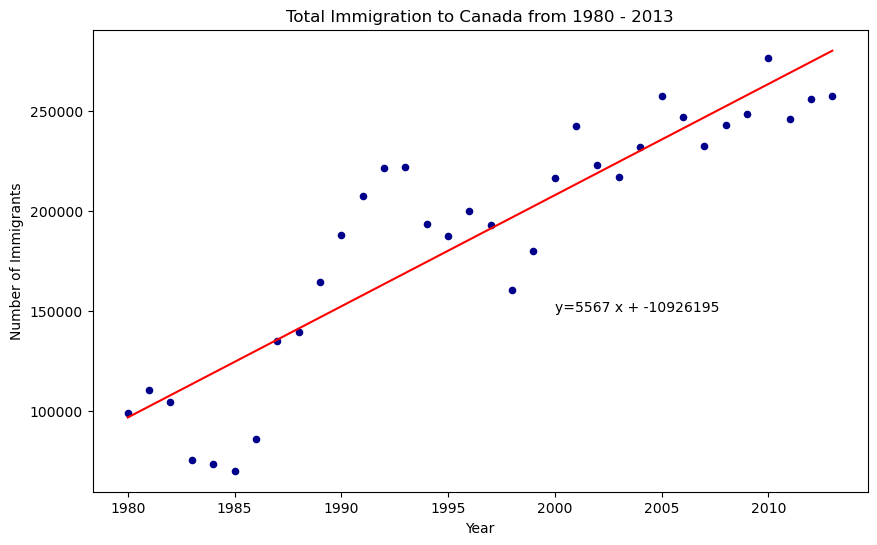

In [26]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))


plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# print out the line of best fit
print('No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) )

plt.show();

Using the equation of line of best fit, we can estimate the number of immigrants in 2015:

No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310

When compared to the actuals from Citizenship and Immigration Canada’s (CIC) 2016 Annual Report, we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good.

# Question: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?


In [27]:
df_countries = canada_df.loc[["Denmark", 'Norway', 'Sweden'], years].transpose()

In [28]:
df_total = pd.DataFrame(df_countries.sum(axis=1).reset_index())

df_total.columns = ['year', 'total']

# change column year from string to int
df_total['year'] = df_total['year'].astype(int)

df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


In [29]:
x = df_total['year']    
y = df_total['total'] 

fit = np.polyfit(x, y, deg=1)
fit

array([-6.14698243e+00,  1.26281563e+04])

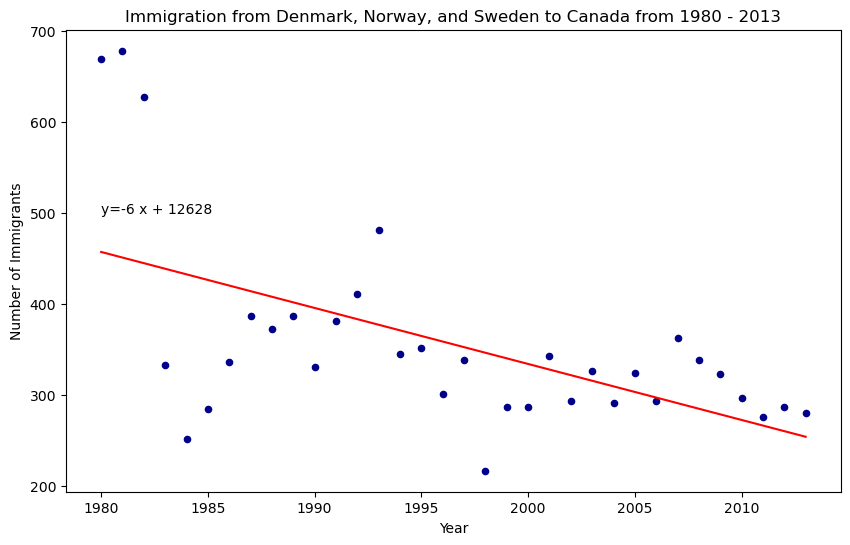

In [30]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# # plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(1980, 500))

plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')


plt.show();

# 5. Bubble Plots

In [31]:
df_can_t = canada_df[years].transpose() 

df_can_t.index = map(int, df_can_t.index)

df_can_t.index.name = 'Year'

df_can_t.reset_index(inplace=True)

df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [32]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

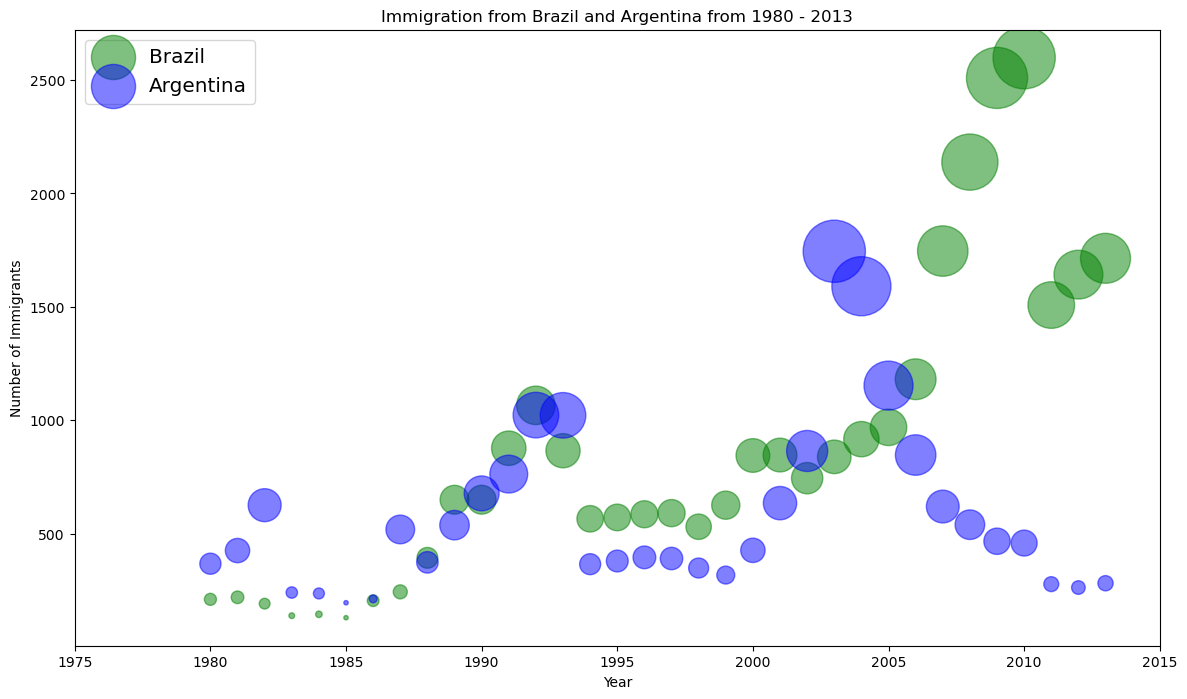

In [33]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,        
                    color='green',
                    s=norm_brazil * 2000 + 10, 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

# Question:  Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013.

In [34]:
# Step 1: Normalize the data pertaining to China and India

# normalize China data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
# normalize India data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

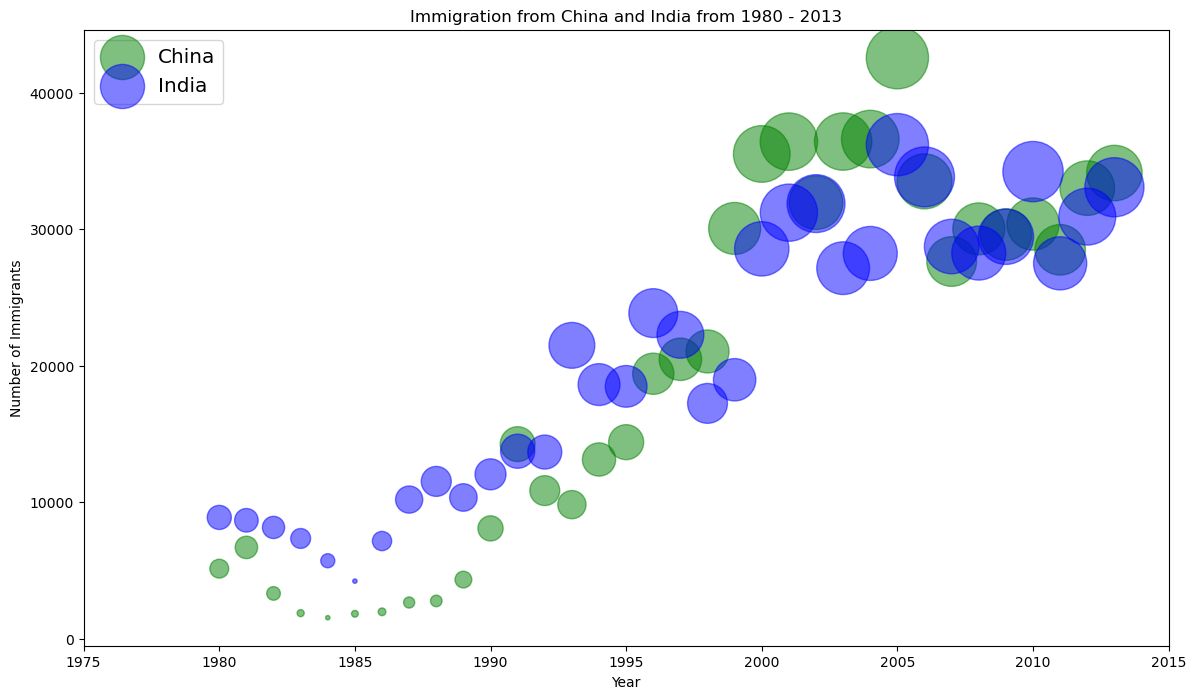

In [35]:
# Step 2: Generate the bubble plots

# China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  
                    color='green',
                    s=norm_china * 2000 + 10,  
                    xlim=(1975, 2015)
                   )

# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')